In [1]:
import pandas as pd
import numpy as np

# Create DataFrame from your image data
data = {
    'Name': ['Anu', 'Binu', 'Chinu', 'Deepa', np.nan, 'Binu'],
    'Math': [78, 90, np.nan, 85, 99, 90],
    'Science': [88, np.nan, 76, 92, 60, np.nan],
    'Age': [15, 14, 16, -14, 17, 14]
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)

Original Data:
    Name  Math  Science  Age
0    Anu  78.0     88.0   15
1   Binu  90.0      NaN   14
2  Chinu   NaN     76.0   16
3  Deepa  85.0     92.0  -14
4    NaN  99.0     60.0   17
5   Binu  90.0      NaN   14


In [2]:
for column in ['Math', 'Science']:
    df[column] = df[column].fillna(df[column].mean())
print("\nAfter filling missing values:")
print(df)


After filling missing values:
    Name  Math  Science  Age
0    Anu  78.0     88.0   15
1   Binu  90.0     79.0   14
2  Chinu  88.4     76.0   16
3  Deepa  85.0     92.0  -14
4    NaN  99.0     60.0   17
5   Binu  90.0     79.0   14


In [3]:
df = df.drop_duplicates()
print("\nAfter removing duplicates:")
print(df)


After removing duplicates:
    Name  Math  Science  Age
0    Anu  78.0     88.0   15
1   Binu  90.0     79.0   14
2  Chinu  88.4     76.0   16
3  Deepa  85.0     92.0  -14
4    NaN  99.0     60.0   17


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['Math', 'Science', 'Age']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("\nAfter normalization:")
print(df)


After normalization:
    Name      Math  Science       Age
0    Anu  0.000000  0.87500  0.935484
1   Binu  0.571429  0.59375  0.903226
2  Chinu  0.495238  0.50000  0.967742
3  Deepa  0.333333  1.00000  0.000000
4    NaN  1.000000  0.00000  1.000000


In [5]:
def assign_grade(score):
    if score < 0.5: return 'F'  # 0-49 in original scale
    elif score < 0.6: return 'D'  # 50-59
    elif score < 0.7: return 'C'  # 60-69
    elif score < 0.8: return 'B'  # 70-79
    else: return 'A'  # 80-100

df['Math_Grade'] = df['Math'].apply(assign_grade)
print("\nAfter adding Math_Grade:")
print(df)


After adding Math_Grade:
    Name      Math  Science       Age Math_Grade
0    Anu  0.000000  0.87500  0.935484          F
1   Binu  0.571429  0.59375  0.903226          D
2  Chinu  0.495238  0.50000  0.967742          F
3  Deepa  0.333333  1.00000  0.000000          F
4    NaN  1.000000  0.00000  1.000000          A


In [6]:
# Reverse normalization to get original Age values
df['Age_original'] = df['Age'] * (17 - (-14)) + (-14)

# Bin into 3 equal-width categories
df['Age_binned'] = pd.cut(df['Age_original'], bins=3, labels=['Young', 'Medium', 'Old'])
print("\nAfter Age binning:")
print(df[['Name', 'Age_original', 'Age_binned']])


After Age binning:
    Name  Age_original Age_binned
0    Anu          15.0        Old
1   Binu          14.0        Old
2  Chinu          16.0        Old
3  Deepa         -14.0      Young
4    NaN          17.0        Old


In [7]:
# Save to CSV
df.to_csv('processed_students.csv', index=False)

# Download to your computer
from google.colab import files
files.download('processed_students.csv')

# Or save to Google Drive
from google.colab import drive
drive.mount('/content/drive')
df.to_csv('/content/drive/MyDrive/processed_students.csv', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mounted at /content/drive


/tmp/ipython-input-8-1353515169.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_binned', y='Age_original', palette='coolwarm')


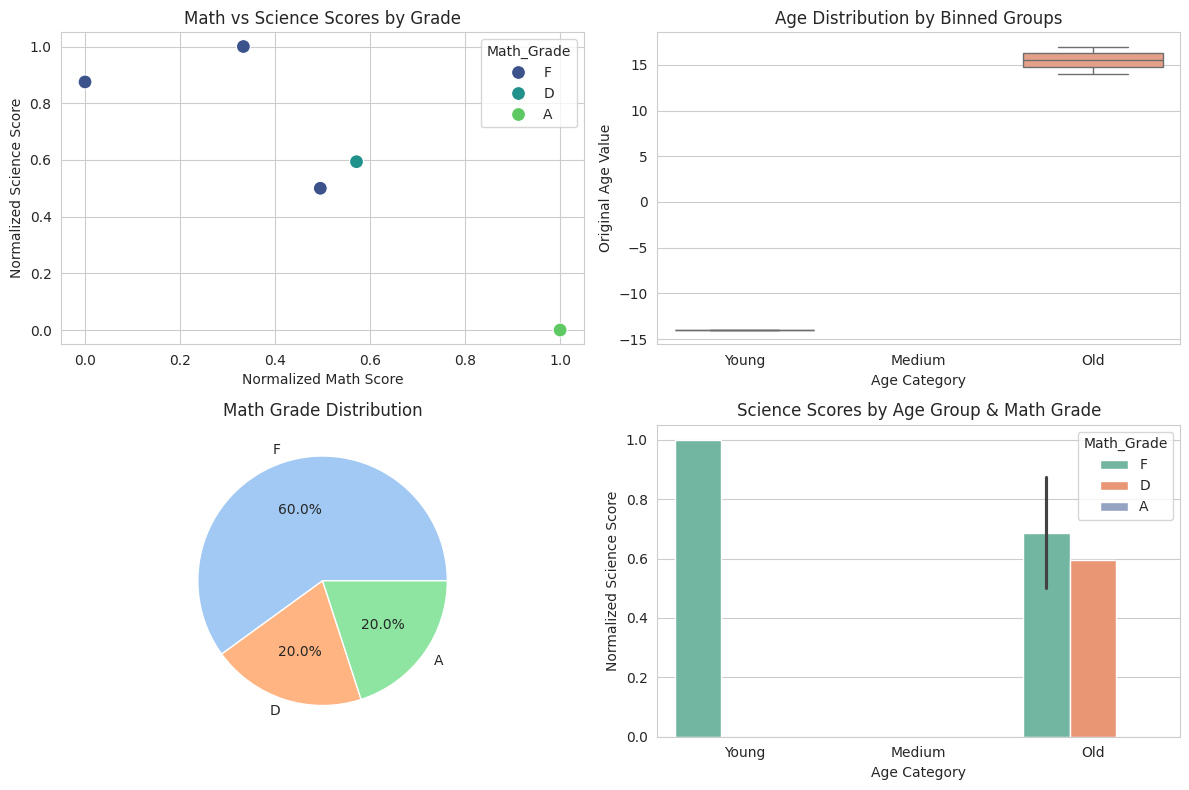

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# 1. Math vs Science Scores Scatter Plot
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Math', y='Science', hue='Math_Grade', palette='viridis', s=100)
plt.title("Math vs Science Scores by Grade")
plt.xlabel("Normalized Math Score")
plt.ylabel("Normalized Science Score")

# 2. Age Distribution Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Age_binned', y='Age_original', palette='coolwarm')
plt.title("Age Distribution by Binned Groups")
plt.xlabel("Age Category")
plt.ylabel("Original Age Value")

# 3. Grade Distribution Pie Chart
plt.subplot(2, 2, 3)
df['Math_Grade'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Math Grade Distribution")
plt.ylabel("")

# 4. Science Score Bar Plot by Age Group
plt.subplot(2, 2, 4)
sns.barplot(data=df, x='Age_binned', y='Science', hue='Math_Grade', palette='Set2')
plt.title("Science Scores by Age Group & Math Grade")
plt.xlabel("Age Category")
plt.ylabel("Normalized Science Score")

plt.tight_layout()
plt.show()